# 05 - PRESELECCIÓN MEJOR MODELO SEGÚN LAZY PREDICT

## IMPORTAR PAQUETES

In [2]:
import numpy as np 
import pandas as pd


from lazypredict.Supervised import LazyClassifier
from sklearn.model_selection import train_test_split

## CARGAR DATOS

In [3]:
df = pd.read_pickle('../../02_Datos/03_Trabajo/df_tablon.pickle')
df.head()

,precio_compra_oe,precio_mto_oe,n_puertas_oe,n_personas_oe,t_maletero_oe,nivel_seguridad_oe,aceptabilidad_oe
0,3.00,3.00,0.00,0.00,0.00,0.00,0.00
1,3.00,3.00,0.00,0.00,0.00,1.00,0.00
2,3.00,3.00,0.00,0.00,0.00,2.00,0.00
3,3.00,3.00,0.00,0.00,1.00,0.00,0.00
4,3.00,3.00,0.00,0.00,1.00,1.00,0.00


## SEPARAR PREDICTORAS Y TARGET

In [7]:
x = df.drop(columns='aceptabilidad_oe').copy()
y = df.aceptabilidad_oe.copy()

## DATASET DE TRAIN Y TEST

In [10]:
train_x, val_x, train_y, val_y = train_test_split(x, y, test_size= 0.3, random_state= 1)

## MODELIZAR SEGÚN LAZYPREDICT

In [11]:
reg = LazyClassifier(verbose=0)
models, predictions = reg.fit(train_x, val_x, train_y, val_y)
models

100%|██████████| 29/29 [00:01<00:00, 18.69it/s]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000859 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 27
[LightGBM] [Info] Number of data points in the train set: 847, number of used features: 6
[LightGBM] [Info] Start training from score -0.359885
[LightGBM] [Info] Start training from score -1.489427
[LightGBM] [Info] Start training from score -3.215340
[LightGBM] [Info] Start training from score -3.307713
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LGBMClassifier,0.98,0.94,None,0.98,0.26
XGBClassifier,0.98,0.94,None,0.98,0.16
DecisionTreeClassifier,0.96,0.90,None,0.96,0.01
BaggingClassifier,0.96,0.86,None,0.96,0.04
ExtraTreesClassifier,0.96,0.83,None,0.96,0.13
NearestCentroid,0.75,0.83,None,0.78,0.01
RandomForestClassifier,0.95,0.81,None,0.95,0.23
KNeighborsClassifier,0.94,0.77,None,0.94,0.03
LabelSpreading,0.93,0.76,None,0.93,0.03


## CONCLUSIÓN:

Probaremos los siguientes modelos:

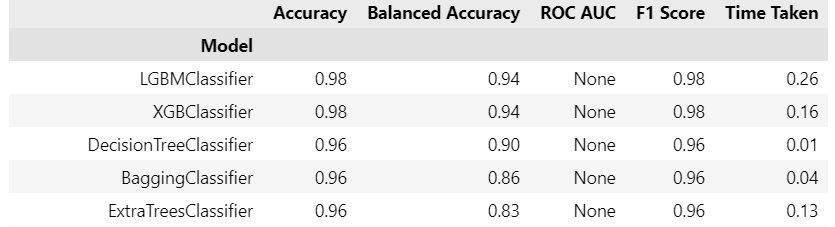

Realizaremos los siguientes procesos:

1. Entrenaremos un modelo sin párametros y revisaremos su accuracy.
2. Si el accuracy es bajo en la validación, realizaremos una preselección de variables y entrenaremos un nuevo modelo sin parámetros.
3. Entrenaremos el mejor modelo e incluiremos parámetros para evitar sobreajuste. 